In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
with open('data.txt') as file:
    data = np.array([np.array([float(digit) for digit in line.split()]) for line in file])

print(data.shape)

(1000, 100)


In [3]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data)
#print(X_train)
#print(X_std)
print(X_std.shape)
mean_vec = np.mean(X_std, axis=0)
cov_mat =( (X_std - mean_vec).T.dot((X_std - mean_vec)) )/ (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

(1000, 100)
Covariance matrix 
[[ 1.001001   -0.52321505  0.94317205 ...  0.94265375  0.94237121
   0.94288611]
 [-0.52321505  1.001001   -0.20759705 ... -0.20788077 -0.20558825
  -0.20688258]
 [ 0.94317205 -0.20759705  1.001001   ...  1.00010242  1.00067435
   1.00074872]
 ...
 [ 0.94265375 -0.20788077  1.00010242 ...  1.001001    0.9999984
   1.00001326]
 [ 0.94237121 -0.20558825  1.00067435 ...  0.9999984   1.001001
   1.00064307]
 [ 0.94288611 -0.20688258  1.00074872 ...  1.00001326  1.00064307
   1.001001  ]]
Eigenvectors 
[[-9.53050756e-02  3.19221524e-01  8.97450276e-03 ...  2.36325419e-02
   6.52363899e-03 -1.30777256e-04]
 [ 2.14520537e-02 -9.46130534e-01 -1.23280120e-03 ...  7.47576184e-03
   1.79442749e-03  8.38941041e-04]
 [-1.00942667e-01 -4.99549304e-03  8.09260067e-03 ...  3.76810482e-02
   6.46600229e-03  3.30571333e-02]
 ...
 [-1.00873233e-01 -4.57243061e-03  8.91669044e-03 ... -9.49146544e-03
   4.62063223e-03  5.81292279e-03]
 [-1.00929380e-01 -6.95935547e-03  9.0689

In [4]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
k = 0
eig_vec_top_2 = np.zeros((2,data.shape[1]))
for i in eig_pairs[:2]:
    print(i[0])
    eig_vec_top_2 [k] = i[1]
    k = k+1



Eigenvalues in descending order:
98.20975315996711
1.0677144032146537


In [5]:
projection_matrix = (eig_vec_top_2.T[:][:]).T


In [6]:
X_pca = X_std.dot(projection_matrix.T)
X_pca

array([[ -9.94401622,   0.88525697],
       [ -0.7294973 ,  -0.44769528],
       [ 18.51866447,  -0.22465377],
       ...,
       [-12.41449921,   1.04980746],
       [ -0.42710404,  -1.01178539],
       [ -6.3518323 ,  -0.05291349]])

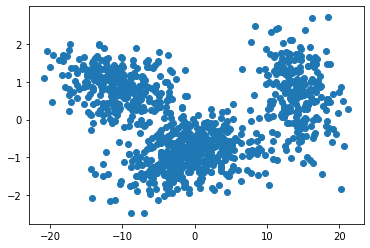

In [7]:
plt.scatter(X_pca.T[0],X_pca.T[1])

plt.savefig('pcaplot.png')
plt.show()

Initialization
Means:
 [[-4.26209577  0.02871596]
 [ 7.80382482  2.04719386]
 [-6.31811969  0.50086761]]
Co-variances:
 [[[ 1.16393397e+02 -1.22512675e-01]
  [-1.22512675e-01  1.06853983e+00]]

 [[ 1.59170396e+02  1.59919342e+01]
  [ 1.59919342e+01  5.26291230e+00]]

 [[ 1.38168348e+02 -3.16770918e+00]
  [-3.16770918e+00  1.31883388e+00]]]
weights:
 [0.33 0.33 0.34]
-5421.70202509679
Before starting EM algo: 5421.70202509679
==================Iteration: 1 =========================
Loglikelihood: 5118.699034138392
==================Iteration: 2 =========================
Loglikelihood: 5072.827064826036
==================Iteration: 3 =========================
Loglikelihood: 5005.144752758481
==================Iteration: 4 =========================
Loglikelihood: 4936.832053204694
==================Iteration: 5 =========================
Loglikelihood: 4885.6154385174
==================Iteration: 6 =========================
Loglikelihood: 4859.902991859009
==================Iteration: 7 ==

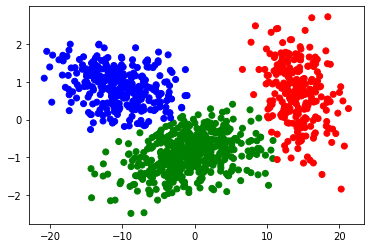

In [8]:

K = 3
D = 2
np.random.seed(42)

means = np.zeros((K,D))
covariances = np.zeros((K,D,D))
#covariances =np.random.randn(K,D,D)
weights =np.array([0.33,0.33,0.34])

from numpy import random


for k in range(K):
    x = random.randint(1000)
    means[k] = X_pca[x]

for k in range(K):
    x = random.randint(1000)
    
    covariances[k]=( (X_pca - means[k]).T.dot((X_pca - means[k])) )/ (X_pca.shape[0]-1)
print("Initialization")
print("Means:\n",means)
print("Co-variances:\n",covariances)
print("weights:\n",weights)
Nk_xi_arr = np.zeros((data.shape[0],K))

for i in range(data.shape[0]):
    for k in range(K):
        
        temp2 = math.sqrt(pow(2*3.1416,D)*abs(np.linalg.det(covariances[k]) ))
        x_i = X_pca[i]
        temp3 = np.linalg.inv(covariances[k])
        row = (x_i - means[k]).reshape(-1,1)
        temp = np.matmul(row.T,(np.matmul(temp3,row)))
        Nk_xi_arr[i][k]=(1/temp2)*np.exp(-0.5*temp)



loglikelihood = 0

for i in range(data.shape[0]):
    sum = 0
    for k in range(K):
        sum = sum + weights[k]*Nk_xi_arr[i,k]
    loglikelihood = loglikelihood + math.log(sum)
print(loglikelihood)
loglikelihood = abs(loglikelihood)
def EM_Algorithm(means,covariances,weights,loglikelihood,Nk_xi_arr,K,D):
   # print("In EM algo function:=============================")
    #print("Means:\n",means)
    #print("Co-variances:\n",covariances)
    #print("weights:\n",weights)
    print("Before starting EM algo:",loglikelihood)
    iteration = 1
    while(True):
        print("==================Iteration:",iteration,"=========================")
        iteration = iteration + 1
        
        P_ik_arr = np.zeros((data.shape[0],K))
       # print(P_ik_arr)
        for i in range(data.shape[0]):
           # denom = np.sum(np.multiply(weights.reshape(1,-1),Nk_xi_arr[i].reshape(1,-1)))
            denominator = 0
            for k in range(K):
                denominator =  denominator + (Nk_xi_arr[i][k]*weights[k])
            for k in range(K):
                P_ik_arr[i][k] = (Nk_xi_arr[i][k]*weights[k]) / denominator
        
       # print(P_ik_arr)
       # print("checking mean")
        for k in range(K):
          #  print(P_ik_arr[:,k].reshape(-1,1)[0])
          #  print(X_pca[0])
          #  print(np.multiply(P_ik_arr[:,k].reshape(-1,1),X_pca)[0])
            numerator = np.sum(np.multiply(P_ik_arr[:,k].reshape(-1,1),X_pca),axis=0)
            denominator = np.sum(P_ik_arr[:,k].reshape(-1,1))
            means[k] = numerator/denominator
        for k in range(K):
            numerator = np.zeros((D,D))
            for i in range(data.shape[0]):
                row = X_pca[i]  - means[k]
                temp = (row.reshape(-1,1))
                temp2 = (row.reshape(1,-1))
                #print("covar calc:",temp,"*",temp2,"=",np.matmul(temp,temp2))
                numerator = numerator + P_ik_arr[i,k]*(np.matmul(temp,temp2))

            denominator = np.sum(P_ik_arr[:,k].reshape(-1,1))
            covariances[k] = numerator/denominator
        N = data.shape[0]
        for k in range(K):
            numerator = np.sum(P_ik_arr[:,k].reshape(-1,1))
            weights[k] = numerator/N
      #  print("Means:\n",means)
       # print("Co-variances:\n",covariances)
        #print("weights:\n",np.sum(weights))
        Nk_xi_arr = np.zeros((data.shape[0],K))
        for i in range(data.shape[0]):
            for k in range(K):
                temp2 = math.sqrt(pow(2*3.1416,D)*abs(np.linalg.det(covariances[k]) ))

                x_i = X_pca[i]
                temp3 = np.linalg.inv(covariances[k])
                row = (x_i - means[k]).reshape(-1,1)
                
                temp = np.matmul(row.T,(np.matmul(temp3,row)))
                Nk_xi_arr[i][k]=(1/temp2)*np.exp(-0.5*temp)
        previous_loglikelihood = loglikelihood
        loglikelihood = 0

        for i in range(data.shape[0]):
            sum = 0
            for k in range(K):
                sum = sum + weights[k]*Nk_xi_arr[i,k]
            loglikelihood = loglikelihood + math.log(sum)
        
        loglikelihood = abs(loglikelihood)
        print("Loglikelihood:",loglikelihood)
        diff = loglikelihood - previous_loglikelihood
      #  print("difference: ",diff)
        #if iteration == 10:
        if abs(diff) <= pow(10,-6):
            print("Final:")
            print("Means:\n",means)
            print("Co-variances:\n",covariances)
            print("weights:\n",weights)
            break
   # print(P_ik_arr)
    return P_ik_arr
        
    
Final_Probability = EM_Algorithm(means,covariances,weights,loglikelihood,Nk_xi_arr,K,D)    
from scipy.special import softmax
softmax_arr = softmax(Final_Probability, axis=1)
boolean_arr = np.zeros_like(softmax_arr)
boolean_arr[np.arange(len(softmax_arr)), softmax_arr.argmax(1)] = 1
color = []
for i in range(data.shape[0]):
    idx = np.where(boolean_arr[i]==1)[0][0]
    if idx == 0:
        color.append( 'green')
    elif idx == 1:
        
        color.append('red')
    elif idx == 2:
        color.append('blue')
  
plt.scatter(X_pca.T[0],X_pca.T[1],c=color)
plt.savefig('em_pca.png')

In [9]:
 
   # plt.show()